# A Totorial on Linear Discriminant Analysis

- [Introduction](#Introduction)
    - [Principal Component Analysis vs. Linear Discriminant Analysis](#Principal-Component-Analysis-vs.-Linear-Discriminant-Analysis)
    - [What is a "good" feature subspace?](#What-is-a-"good"-feature-subspace?)
    - [Summarizing the LDA approach in 5 steps](#Summarizing-the-LDA-approach-in-6-steps)
    - [About the Iris dataset](#About-the-Iris-dataset)
- [LDA in 5 steps](#LDA-in-5-steps)
    - [Step 1: Computing the d-dimensional mean vectors](#Step-1:-Computing-the-d-dimensional-mean-vectors)
    - [Step 2: Computing the Scatter Matrices](#Step-2:-Computing-the-Scatter-Matrices)
    - [Step 3: Solving the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$](#Step-3:-Solving-the-generalized-eigenvalue-problem-for-the-matrix-$S_{W}^{-1}S_B$)
    - [Step 4: Selecting linear discriminants for the new feature subspace](#Step-4:-Selecting-linear-discriminants-for-the-new-feature-subspace)
    - [Step 5: Transforming the samples onto the new subspace](#Step-5:-Transforming-the-samples-onto-the-new-subspace)
- [A comparison of PCA and LDA](#A-comparison-of-PCA-and-LDA)
- [LDA via scikit-learn](#LDA-via-scikit-learn)
- [A Note About Standardization](#A-Note-About-Standardization)

# Introduction

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. 
The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

Ronald A. Fisher formulated the *Linear Discriminant* in 1936 ([The Use of Multiple  Measurements in Taxonomic Problems](http://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x/abstract)), and it also has some practical uses as classifier. The original Linear discriminant was described for a 2-class problem, and it was then later generalized as "multi-class Linear Discriminant Analysis" or "Multiple Discriminant Analysis" by C. R. Rao in 1948 ([The utilization of multiple measurements in problems of biological classification](http://www.jstor.org/stable/2983775))


The general LDA approach is very similar to a Principal Component Analysis (for more information about the PCA, see the previous article [Implementing a Principal Component Analysis (PCA) in Python step by step](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)), but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

So, in a nutshell, often the goal of an LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace $k$ (where $k \leq n-1$) while maintaining the class-discriminatory information.   
In general, dimensionality reduction does not only help reducing computational costs for a given classification task, but it can also be helpful to avoid overfitting by minimizing the error in parameter estimation ("curse of dimensionality").

## Principal Component Analysis vs. Linear Discriminant Analysis

Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an "unsupervised" algorithm, since it "ignores" class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset.
In contrast to PCA, LDA is "supervised" and computes the directions ("linear discriminants") that  will represent the axes that that maximize the separation between multiple classes.

Although it might sound intuitive that LDA is superior to PCA for a multi-class classification task where the class labels are known, this might not always the case.  
For example, comparisons between classification accuracies for image recognition after using PCA or LDA show that PCA tends to outperform LDA if the number of samples per class is relatively small ([PCA vs. LDA](http://ieeexplore.ieee.org/xpl/articleDetails.jsp?arnumber=908974), A.M. Martinez et al., 2001).
In practice, it is also not uncommon to use both LDA and PCA in combination: E.g., PCA for dimensionality reduction followed by an LDA.

## What is a "good" feature subspace?

Let's assume that our goal is to reduce the dimensions of a $d$-dimensional dataset by projecting it onto a $(k)$-dimensional subspace (where $k\;<\;d$). 
So, how do we know what size we should choose for $k$ ($k$ = the number of dimensions of the new feature subspace), and how do we know if we have a feature space that represents our data "well"?  

Later, we will compute eigenvectors (the components) from our data set and collect them in a so-called scatter-matrices (i.e., the in-between-class scatter matrix and within-class scatter matrix).  
Each of these eigenvectors is associated with an eigenvalue, which tells us about the "length" or "magnitude" of the eigenvectors. 

If we would observe that all eigenvalues have a similar magnitude, then this may be a good indicator that our data is already projected on a "good" feature space.  

And in the other scenario, if some of the eigenvalues are much much larger than others, we might be interested in keeping only those eigenvectors with the highest eigenvalues, since they contain more information about our data distribution. Vice versa, eigenvalues that are close to 0 are less informative and we might consider dropping those for constructing the new feature subspace.

## Summarizing the LDA approach in 5 steps

Listed below are the 5 general steps for performing a linear discriminant analysis; we will explore them in more detail in the following sections.

1. Compute the $d$-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors ($\pmb e_1, \; \pmb e_2, \; ..., \; \pmb e_d$) and corresponding eigenvalues ($\pmb \lambda_1, \; \pmb \lambda_2, \; ..., \; \pmb \lambda_d$) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $d \times k$ dimensional matrix $\pmb W\;$ (where every column represents an eigenvector).
5. Use this $d \times k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication $\pmb Y = \pmb X \times \pmb W$ (where $\pmb X$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\pmb y$ are the transformed $n \times k$-dimensional samples in the new subspace).

## About the Iris dataset

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository  
(https://archive.ics.uci.edu/ml/datasets/Iris).



<font size="1">
**Reference:**
Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.</font>

The iris dataset contains measurements for 150 iris flowers from  three different species.

The three classes in the Iris dataset:

1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:

1.	sepal length in cm
2.	sepal width in cm
3.	petal length in cm
4.	petal width in cm


# LDA in 5 steps

After we went through several preparation steps, our data is finally ready for the actual LDA. In practice, LDA for dimensionality reduction would be just another preprocessing step for a typical machine learning or pattern classification task.

## Step 1: Computing the d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors $\pmb m_i$, $(i = 1,2,3)$ of the 3 different flower classes:
    
$\pmb m_i = \begin{bmatrix} 
\mu_{\omega_i (\text{sepal length)}}\\ 
\mu_{\omega_i (\text{sepal width})}\\ 
\mu_{\omega_i (\text{petal length)}}\\
\mu_{\omega_i (\text{petal width})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3$

In [61]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(3):
    # TODO -- please find the mean for each class
    indices = np.where(y == cl)[0]

    mean_vec = np.mean(X[indices], axis=0)
    mean_vectors.append(mean_vec)

for i, mean_vector in enumerate(mean_vectors):
    print(f"Mean Vector class {i}: {mean_vector}")    

Mean Vector class 0: [5.006 3.428 1.462 0.246]
Mean Vector class 1: [5.936 2.77  4.26  1.326]
Mean Vector class 2: [6.588 2.974 5.552 2.026]


##  Step 2: Computing the Scatter Matrices

Now, we will compute the two *4x4*-dimensional matrices: The within-class and the between-class scatter matrix.

### 2.1 Within-class scatter matrix $S_W$

The **within-class scatter** matrix $S_W$ is computed by the following equation:  

$S_W = \sum\limits_{i=1}^{c}  S_i$

where  
$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$  
(scatter matrix for every class) 

and $\pmb m_i$ is the mean vector    
$\pmb m_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k$

In [62]:
reg_param = 1e-4

S_W = np.zeros((4,4))
for cl,mv in zip(range(3), mean_vectors):
    # TODO -- please calculate S_W
    class_scatter = np.zeros((4,4))
    for row in X[y==cl]:
        class_scatter += (row - mv) @ (row - mv).T 
    class_scatter += reg_param * np.eye(4)
    S_W += class_scatter


print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[89.2977 89.2974 89.2974 89.2974]
 [89.2974 89.2977 89.2974 89.2974]
 [89.2974 89.2974 89.2977 89.2974]
 [89.2974 89.2974 89.2974 89.2977]]


### 2.2 Between-class scatter matrix $S_B$

The **between-class scatter** matrix $S_B$ is computed by the following equation:  

$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T$

where  
 $\pmb m$ is the overall mean, and $\pmb m_{i}$ and $N_{i}$ are the sample mean and sizes of the respective classes.

In [63]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    # TODO -- please calculate S_B
    n = X[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    S_B += n * (mean_vec - overall_mean) @ (mean_vec - overall_mean).T 

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


## Step 3: Solving the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$

Next, we will solve the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$ to obtain the linear discriminants.

In [64]:
# TODO -- please output eig_vals and eig_vecs by eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.0501]
 [ 0.6866]
 [-0.7253]
 [-0.0114]]
Eigenvalue 1: 9.41e+05

Eigenvector 2: 
[[-0.5059]
 [ 0.5273]
 [ 0.4719]
 [-0.4932]]
Eigenvalue 2: 1.56e+02

Eigenvector 3: 
[[-0.4199]
 [-0.1582]
 [-0.2309]
 [ 0.8633]]
Eigenvalue 3: -1.43e-11

Eigenvector 4: 
[[-0.5427]
 [ 0.4444]
 [ 0.4861]
 [-0.5212]]
Eigenvalue 4: 3.19e-10


After this decomposition of our square matrix into eigenvectors and eigenvalues, let us briefly recapitulate how we can interpret those results. As we remember from our first linear algebra class in high school or college, both eigenvectors and eigenvalues are providing us with information about the distortion of a linear transformation: The eigenvectors are basically the direction of this distortion, and the eigenvalues are the scaling factor for the eigenvectors that describing the magnitude of the distortion.  

If we are performing the LDA for dimensionality reduction, the eigenvectors are important since they will form the new axes of our new feature subspace; the associated eigenvalues are of particular interest since they will tell us how "informative" the new "axes" are.  

Let us briefly double-check our calculation and talk more about the eigenvalues in the next section.

### Checking the eigenvector-eigenvalue calculation



A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:

$\pmb A\pmb{v} =  \lambda\pmb{v}$  

<br>
where  
$\pmb A = S_{W}^{-1}S_B\\
\pmb{v} = \; \text{Eigenvector}\\
\lambda = \; \text{Eigenvalue}$

In [65]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1) 
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv), 
                                         eig_vals[i] * eigv, 
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


## Step 4: Selecting linear discriminants for the new feature subspace

### 4.1. Sorting the eigenvectors by decreasing eigenvalues



Remember from the introduction that we are not only interested in merely projecting the data into a subspace that improves the class separability, but also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace). 

However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.  
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [66]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

941399.517350543
156.34944665204455
3.185064757236168e-10
1.4278788154550348e-11


In [67]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.98%
eigenvalue 2: 0.02%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


If we take a look at the eigenvalues, we can already see that 2 eigenvalues are close to 0. The reason why these are close to 0 is not that they are not informative but it's a floating-point imprecision. In fact, these two last eigenvalues should be exactly zero: In LDA, the number of linear discriminants is at most $c−1$ where $c$ is the number of class labels, since the in-between scatter matrix $S_B$ is the sum of $c$ matrices with rank 1 or less. Note that in the rare case of perfect collinearity (all aligned sample points fall on a straight line), the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue.

The first eigenpair is by far the most informative one, and we won't loose much information if we would form a 1D-feature spaced based on this eigenpair.

### 4.2. Choosing *k* eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d \times k$-dimensional eigenvector matrix $\pmb W$ (here $4 \times 2$: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [68]:
# TODO -- please find the optimal W
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.0501 -0.5059]
 [ 0.6866  0.5273]
 [-0.7253  0.4719]
 [-0.0114 -0.4932]]


# Step 5: Transforming the samples onto the new subspace

In the last step, we use the $4 \times 2$-dimensional matrix $\pmb W$ that we just computed to transform our samples onto the new subspace via the equation   

$\pmb Y = \pmb X \times \pmb W $.

(where $\pmb X$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\pmb Y$ are the transformed $n \times k$-dimensional samples in the new subspace).

In [69]:
# TODO -- please find the position of each sample after projection denoted by X_lda
X_lda = X @ W
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

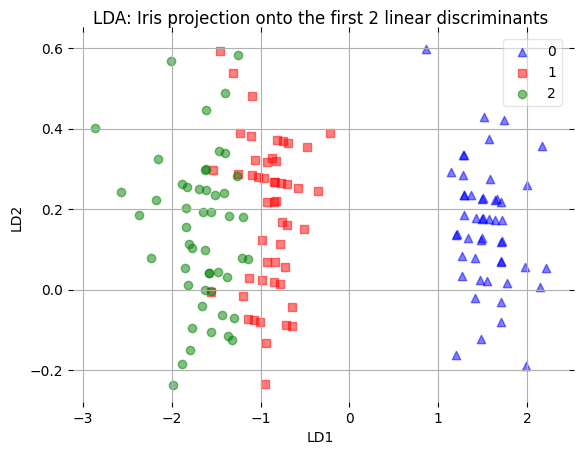

In [70]:
from matplotlib import pyplot as plt

def plot_step_lda():
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label]*-1,
                marker=marker,
                color=color,
                alpha=0.5,
                label=label#_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
 
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()

The scatter plot above represents our new feature subspace that we constructed via LDA. We can see that the first linear discriminant "LD1" separates the classes quite nicely. However, the second discriminant, "LD2", does not add much valuable information, which we've already concluded when we looked at the ranked eigenvalues is step 4.

# A comparison of PCA and LDA

In order to compare the feature subspace that we obtained via the Linear Discriminant Analysis, we will use the `PCA` class from the `scikit-learn` machine-learning library. 
For our convenience, we can directly specify to how many components we want to retain in our input dataset via the `n_components` parameter. 

    n_components : int, None or string
    
    Number of components to keep. if n_components is not set all components are kept:
        n_components == min(n_samples, n_features)
        if n_components == ‘mle’, Minka’s MLE is used to guess the dimension if 0 < n_components < 1, 
        select the number of components such that the amount of variance that needs to be explained 
        is greater than the percentage specified by n_components

But before we skip to the results of the respective linear transformations, let us quickly recapitulate the purposes of PCA and LDA: PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class seperability. In practice, often a LDA is done followed by a PCA for dimensionality reduction.


![](https://raw.githubusercontent.com/rasbt/pattern_classification/master/Images/lda_1.png)

In [71]:
from sklearn.decomposition import PCA as sklearnPCA

# TODO -- please find the position of each sample after projection denoted by X_pca using sklearnPCA
pca = sklearnPCA(n_components=2)
X_pca = pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)
    
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label#_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
    
    plt.tight_layout
    plt.grid()
    
    plt.show()

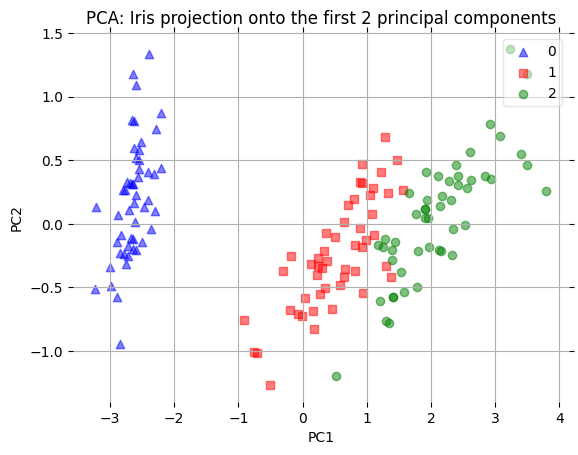

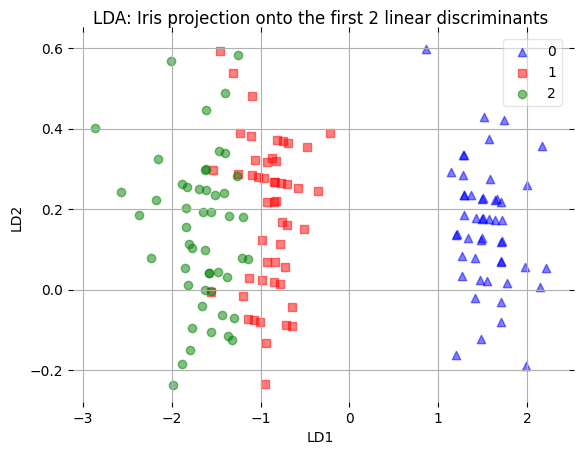

In [72]:
plot_pca()
plot_step_lda()

The two plots above nicely confirm what we have discussed before: Where the PCA accounts for the most variance in the whole dataset, the LDA gives us the axes that account for the most variance between the individual classes.

# LDA via scikit-learn

Now, after we have seen how an Linear Discriminant Analysis works using a step-by-step approach, there is also a more convenient way to achive the same via the `LDA` class implemented in the [`scikit-learn`](http://scikit-learn.org/stable/) machine learning library.


In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# TODO -- please find the position of each sample after projection denoted by X_lda_sklearn using sklearnPCA
lda = LDA(n_components=2)
X_lda_sklearn = lda.fit_transform(X, y)

print("Pos of samples after LDA projection:\n", X_lda_sklearn)

Pos of samples after LDA projection:
 [[ 8.0618e+00 -3.0042e-01]
 [ 7.1287e+00  7.8666e-01]
 [ 7.4898e+00  2.6538e-01]
 [ 6.8132e+00  6.7063e-01]
 [ 8.1323e+00 -5.1446e-01]
 [ 7.7019e+00 -1.4617e+00]
 [ 7.2126e+00 -3.5584e-01]
 [ 7.6053e+00  1.1634e-02]
 [ 6.5606e+00  1.0152e+00]
 [ 7.3431e+00  9.4732e-01]
 [ 8.3974e+00 -6.4736e-01]
 [ 7.2193e+00  1.0965e-01]
 [ 7.3268e+00  1.0730e+00]
 [ 7.5725e+00  8.0546e-01]
 [ 9.8498e+00 -1.5859e+00]
 [ 9.1582e+00 -2.7376e+00]
 [ 8.5824e+00 -1.8345e+00]
 [ 7.7808e+00 -5.8434e-01]
 [ 8.0784e+00 -9.6858e-01]
 [ 8.0210e+00 -1.1405e+00]
 [ 7.4968e+00  1.8838e-01]
 [ 7.5865e+00 -1.2080e+00]
 [ 8.6810e+00 -8.7759e-01]
 [ 6.2514e+00 -4.3970e-01]
 [ 6.5589e+00  3.8922e-01]
 [ 6.7714e+00  9.7063e-01]
 [ 6.8231e+00 -4.6301e-01]
 [ 7.9246e+00 -2.0964e-01]
 [ 7.9913e+00 -8.6379e-02]
 [ 6.8295e+00  5.4496e-01]
 [ 6.7590e+00  7.5900e-01]
 [ 7.3750e+00 -5.6584e-01]
 [ 9.1263e+00 -1.2244e+00]
 [ 9.4677e+00 -1.8252e+00]
 [ 7.0620e+00  6.6340e-01]
 [ 7.9588e+00  1.

In [74]:
def plot_scikit_lda(X, title):
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):
        
        plt.scatter(x=X[:,0][y == label]*-1,
                    y=X[:,1][y == label], # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label)
  
    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
 
    plt.grid()
    plt.tight_layout
    plt.show()

<br>
<br>

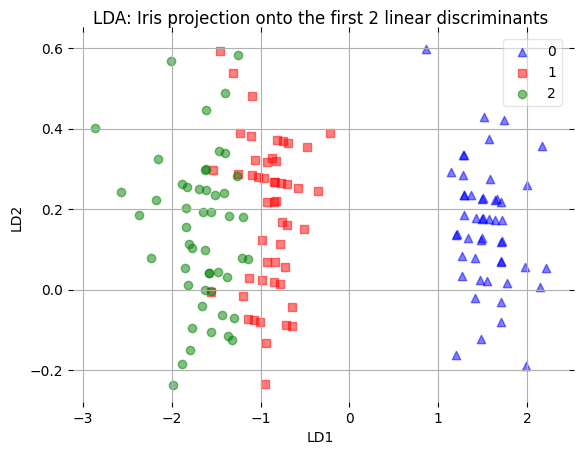

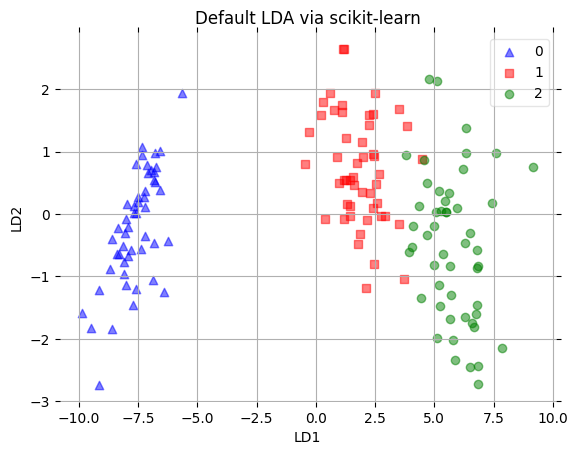

In [75]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

# A Note About Standardization

To follow up on a question that I received recently, I wanted to clarify that feature scaling such as [standardization] does **not** change the overall results of an LDA and thus may be optional. Yes, the scatter matrices will be different depending on whether the features were scaled or not. In addition, the eigenvectors will be different as well. However, the important part is that the eigenvalues will be exactly the same as well as the final projects -- the only difference you'll notice is the scaling of the component axes. This can be shown mathematically (I will insert the formulaes some time in future), and below is a practical, visual example for demonstration.

After loading the dataset, we are going to standardize the columns in `X`. Standardization implies mean centering and scaling to unit variance:

$$x_{std} = \frac{x - \mu_x}{\sigma_X}$$

After standardization, the columns will have zero mean ( $\mu_{x_{std}}=0$ ) and a standard deviation of 1 ($\sigma_{x_{std}}=1$).

In [76]:
# TODO -- please manually output X_std
mean = np.mean(X, axis=0)
std = np.std(X,  axis=0)

X_std = (X - mean) / std

Below, I simply copied the individual steps of an LDA, which we discussed previously, into Python functions for convenience.

In [77]:
import numpy as np

def comp_mean_vectors(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    mean_vectors = []
    # TODO -- calculate mean_vectors
    indices = np.where(y == cl)[0]

    mean_vec = np.mean(X[indices], axis=0)
    mean_vectors.append(mean_vec)

    return mean_vectors
        
def scatter_within(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        # TODO -- output S_W
        class_scatter = np.zeros((4,4))
        for row in X[y==cl]:
            class_scatter += (row - mv) @ (row - mv).T 
        class_scatter += reg_param * np.eye(4)
        S_W += class_scatter
                         
    return S_W

def scatter_between(X, y):
    overall_mean = np.mean(X, axis=0)
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)    
    S_B = np.zeros((n_features, n_features))
    for i, mean_vec in enumerate(mean_vectors):  
        # TODO -- output S_B
        n = X[y==i,:].shape[0]
        mean_vec = mean_vec.reshape(4,1)
        overall_mean = overall_mean.reshape(4,1)
        S_B += n * (mean_vec - overall_mean) @ (mean_vec - overall_mean).T 
        
    return S_B

def get_components(eig_vals, eig_vecs, n_comp=2):
    n_features = X.shape[1]
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    # TODO -- output W
    W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])
    return W

First, we are going to print the eigenvalues, eigenvectors, transformation matrix of the un-scaled data:

In [78]:
S_W, S_B = scatter_within(X, y), scatter_between(X, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W)

EigVals: [0.0000e+00+0.0000e+00j 8.8520e+05+0.0000e+00j 4.0034e-11+7.3889e-12j
 4.0034e-11-7.3889e-12j]

EigVecs: [[-0.8794+0.j     -0.057 +0.j     -0.2445+0.1506j -0.2445-0.1506j]
 [-0.324 +0.j     -0.6793+0.j     -0.9027+0.j     -0.9027-0.j    ]
 [ 0.3489+0.j      0.7316+0.j      0.1622-0.1156j  0.1622+0.1156j]
 [ 0.0022+0.j      0.0046+0.j     -0.2228+0.1151j -0.2228-0.1151j]]

W: [[-0.057 +0.j     -0.2445+0.1506j]
 [-0.6793+0.j     -0.9027+0.j    ]
 [ 0.7316+0.j      0.1622-0.1156j]
 [ 0.0046+0.j     -0.2228+0.1151j]]


/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


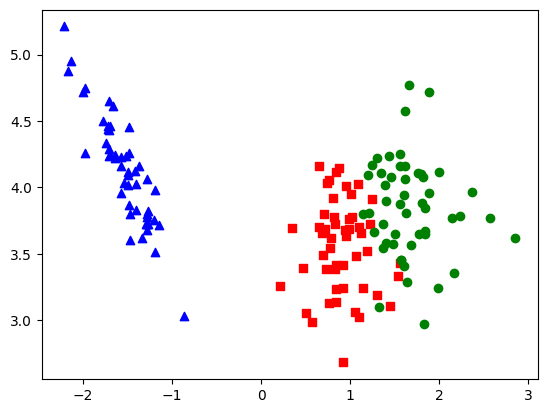

In [79]:
# TODO -- please find the position of each sample after projection denoted by X_lda by X*W

X_lda = X@W
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
            plt.scatter(X_lda[y==label, 0], -X_lda[y==label, 1], 
            color=color, marker=marker)

Next, we are repeating this process for the standarized flower dataset:

In [80]:
S_W, S_B = scatter_within(X_std, y), scatter_between(X_std, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W_std = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W_std)

EigVals: [ 5.8208e-11  5.4453e+05 -6.8018e-12  1.1244e-11]

EigVecs: [[-0.7017  0.1895  0.1555 -0.013 ]
 [-0.6233 -0.859   0.9808 -0.9157]
 [ 0.2191  0.3019  0.1045  0.2067]
 [ 0.2667  0.3676 -0.054  -0.3443]]

W: [[ 0.1895 -0.7017]
 [-0.859  -0.6233]
 [ 0.3019  0.2191]
 [ 0.3676  0.2667]]


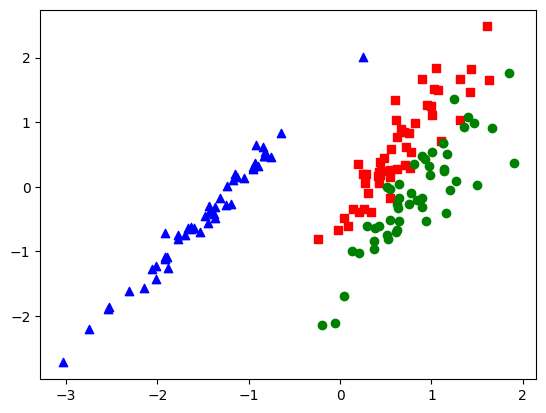

In [81]:
# TODO -- please find the position of each sample after projection denoted by X_std_lda by X_ltd*W
X_std_lda = X_std @ W
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_std_lda[y==label, 0], X_std_lda[y==label, 1], 
                color=color, marker=marker)

As we can see, the eigenvalues are excactly the same whether we scaled our data or not (note that since $W$ has a rank of 2, the two lowest eigenvalues in this 4-dimensional dataset should effectively be 0). Furthermore, we see that the projections look identical except for the different scaling of the component axes and that it is mirrored in this case.